<a href="https://colab.research.google.com/github/pawaniu/AdvancedNodeComplete/blob/master/nlp_try_2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="text-align: center;"><b><font  style="text-align:center" color= Purple size=6>NLP Assignment 2 <br> Set E <b><br>Group Number: 154<br><br>Group Members:</font></p>
<table style="border:1px solid black">
  <tr>
    <th>Name </th>
   <th>Bits Roll Number</th>
    <th>Contribution</th>
  </tr>
  <tr>
    <td><b>PAWAN KUMAR GUPTA<b></td>
    <td><b>2021sc04394<b></td>
    <td><b>100%<b></td>
  </tr>
  <tr>
    <td><b>GIRIJA MANASH GOUDA <b></td>
    <td><b>2021sc04393<b></td>
    <td><b>100%<b></td>
  </tr>
  <tr>
    <td><b>ASHISH RANJANA<b></td>
    <td><b>2021sc04505<b></td>
    <td><b>100%<b></td>
  </tr>
  <tr>
    <td><b>G HEMAVATHI<b></td>
    <td><b>2021sc04711<b></td>
    <td><b>100%<b></td>
  </tr>
</table><br>::

In [ ]:
# execute one time - if run time get reset
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 39.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
tensorflow 2.13.0 

In [ ]:
# installing compatible version of panda v1.5.3 to pyLDAvis
!pip install pandas==1.5.3

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# import libs
import random
import pandas as pd
import numpy as np
import re
import string
import spacy
import gensim
from gensim import corpora

from gensim.utils import simple_preprocess
from spacy import displacy

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt


%matplotlib inline


In [ ]:
from gensim.models import CoherenceModel, HdpModel, LdaModel


<b>Question 1 - Perform EDA and necessary pre-processing steps in dataset</b>

Read the data from the csv file. And fetch first 5000 records in dataframe

In [ ]:
data_df = pd.read_csv("uci-news-aggregator.csv",encoding='unicode_escape')
data_df = data_df.head(5000)

In [ ]:
# EDA
data_df.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1.394470e+12
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1.394470e+12
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1.394470e+12
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1.394470e+12


Creating list of title collumn where we need to perform topic modeling

In [ ]:
news_title = data_df.TITLE.values.tolist()

In [ ]:
# Removeing the new line characters and single quotes
news_title = [re.sub('\S*@\S*\s?', '', sent) for sent in news_title]

In [ ]:
# Remove new line characters
news_title = [re.sub('\s+', ' ', sent) for sent in news_title]

In [ ]:
# Remove the unnecessary single qoutes in the list
news_title = [re.sub("\'", "", sent) for sent in news_title]

In [ ]:
# display last 10 rows of news title
news_title[:10]

['Fed official says weak data caused by weather, should not slow taper',
 'Feds Charles Plosser sees high bar for change in pace of tapering',
 'US open: Stocks fall after Fed official hints at accelerated tapering',
 'Fed risks falling behind the curve, Charles Plosser says',
 'Feds Plosser: Nasty Weather Has Curbed Job Growth',
 'Plosser: Fed May Have to Accelerate Tapering Pace',
 'Feds Plosser: Taper pace may be too slow',
 'Feds Plosser expects US unemployment to fall to 6.2% by the end of 2014',
 'US jobs growth last month hit by weather:Fed President Charles Plosser',
 'ECB unlikely to end sterilisation of SMP purchases - traders']

In [ ]:
# breaking connected words and removing special characters

news_title = [re.sub("-", " ", sent) for sent in news_title]
news_title = [re.sub("_", " ", sent) for sent in news_title]
news_title = [re.sub(":", "", sent) for sent in news_title]
news_title = [re.sub("_", " ", sent) for sent in news_title]
news_title = [re.sub("\.\.\.", "", sent) for sent in news_title]

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

news_words = list(sent_to_words(news_title))

In [ ]:
# Build the bigram models and combine sentence in bigram

bigram = gensim.models.Phrases(news_words, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)


In [ ]:
def remove_stopwords(texts):
    print(stop_words)
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# NLTK Stop words
# Extend the list of the stop words by extending more english worlds
import nltk;
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
additional_stop_words= ['from', 'subject', 're', 'edu', 'use','a','about', 'above', 'across', 'snl', 'get', 'say', 'new', 'pm','ex','s','get','io','m', 'let', 'st', 'hi', 'fi','after', 'afterwards','again','against', 'all', 'almost','alone','along',
'already','also','although','always','am','among','amongst','amoungst','amount','an','and','another','any','anyhow','anyone','anything','anyway','anywhere','are','around','as','at','back','be','became','because','become','becomes','becoming',
                        'been','before','beforehand','behind','being','below','beside','besides','between','beyond','bill','both','bottom','but','by','call','can','cannot','cant','co','con','could','couldnt','cry','de','describe','detail','do',
                        'done','down','due','during','each','eg','eight','either','eleven','else','elsewhere','empty','enough','etc','even','ever','every','everyone','everything','everywhere','except','few','fifteen','fifty','fill','find','fire',
                        'first','five','for','former','formerly','forty','found','four','from','front','full','further','get','give','go','had','has','hasnt','have','he','hence','her','here','hereafter','hereby','herein','hereupon','hers','herself',
                        'him','himself','his','how','however','hundred','i','ie','if','in','inc','indeed','interest','into','is','it','its','itself','keep','last','latter','latterly','least','less','ltd','made','many','may','me','meanwhile','might',
                        'mill','mine','more','moreover','most','mostly','move','much','must','my','myself','name','namely','neither','never','nevertheless','next','nine','no','nobody','none','noone','nor','not','nothing','now','nowhere','of','off','often',
                        'on','once','one','only','onto','or','other','others','otherwise','our','ours','ourselves','out','over','own','part','per','perhaps','please','put','rather','re','same','see','seem','seemed','seeming','seems','serious','several',
                        'she','should','show','side','since','sincere','six','sixty','so','some','somehow','someone','something','sometime','sometimes','somewhere','still','such','system','take','ten','than','that','the','their','them','themselves','then',
                        'thence','there','thereafter','thereby','therefore','therein','thereupon','these','they','thick','thin','third','this','those','though','three','through','throughout','thru','thus','to','together','too','top','toward','towards',
                        'twelve','twenty','two','un','under','until','up','upon','us','very','via','was','we','well','were','what','whatever','when','whence','whenever','where','whereafter','whereas','whereby','wherein','whereupon','wherever','whether',
                        'which','while','whither','who','whoever','whole','whom','whose','why','will','with','within','without','would','yet','you','your','yours','yourself','yourselves']
stop_words.extend(additional_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove Stop Words

news_words_final = remove_stopwords(news_words)

# Create Bigrams

data_words_bigrams = make_bigrams(news_words_final)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

news_words_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

<b>Question 2 - Using the LDA algorithm create the Topics (Min 10) for the Corpus</b>

In [ ]:
# Create Dictionary
news_id2word = corpora.Dictionary(news_words_lemmatized)

# Create Corpus
news_texts = news_words_lemmatized

# Term Document Frequency
news_corpus = [news_id2word.doc2bow(text) for text in news_texts]

In [ ]:
[[(news_id2word[id], freq) for id, freq in cp] for cp in news_corpus[11:12]]

[[('bake', 1), ('bank', 1), ('union', 1), ('work', 1)]]

In [ ]:
lda_model_news_article = gensim.models.ldamodel.LdaModel(corpus=news_corpus,
                                           id2word=news_id2word,
                                           num_topics=10,
                                           random_state=42,
                                           update_every=11,
                                           chunksize=100,
                                           passes=100,
                                           alpha='auto',
                                           per_word_topics=True)

<b>Question 3 - Compute the coherence score and print Topics Extracted</b>

In [ ]:
# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model_news_article, texts=news_words_lemmatized, dictionary=news_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5445156131497383


 Extracted Topics

In [ ]:
lda_model_news_article.print_topics()

[(0,
  '0.076*"bachelor" + 0.067*"finale" + 0.028*"true_detective" + 0.027*"spoiler" + 0.021*"tax" + 0.020*"juan_pablo" + 0.016*"pick" + 0.013*"call" + 0.013*"reality" + 0.013*"rating"'),
 (1,
  '0.040*"miley_cyrus" + 0.031*"girl" + 0.022*"bankruptcy" + 0.022*"file" + 0.021*"watch" + 0.021*"word" + 0.019*"perform" + 0.018*"time" + 0.018*"scandal" + 0.017*"ban_bossy"'),
 (2,
  '0.048*"carney" + 0.034*"tanker" + 0.032*"libyan" + 0.030*"bank" + 0.023*"say" + 0.018*"oil" + 0.018*"bitcoin_exchange" + 0.015*"economy" + 0.014*"price" + 0.014*"escape"'),
 (3,
  '0.038*"stacy_keibl" + 0.026*"deposition" + 0.023*"s" + 0.021*"justin_bieber" + 0.018*"george_clooney" + 0.016*"tell" + 0.015*"public" + 0.014*"star" + 0.012*"secret" + 0.012*"prince_harry"'),
 (4,
  '0.024*"season" + 0.024*"video" + 0.017*"titanfall" + 0.016*"game" + 0.016*"throne" + 0.014*"taxis" + 0.012*"trailer" + 0.012*"live" + 0.011*"week" + 0.011*"launch"'),
 (5,
  '0.087*"stock" + 0.037*"market" + 0.030*"fall" + 0.025*"low" + 0.

<b>Question - 4 Visualize the topics </b>


In [ ]:
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model_news_article, news_corpus, news_id2word)
#vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.366130  0.012094       1        1  30.045811
1     -0.034409  0.225766       2        1  10.423772
6     -0.004672 -0.018887       3        1  10.097529
3     -0.049170  0.148763       4        1   9.267280
0     -0.131363  0.027988       5        1   9.209519
5     -0.037146 -0.260994       6        1   8.911006
8     -0.042090 -0.036205       7        1   6.530297
9     -0.014282  0.031982       8        1   5.910222
2     -0.027583 -0.075888       9        1   5.050897
7     -0.025414 -0.054619      10        1   4.553667, topic_info=                Term        Freq       Total Category  logprob  loglift
18             stock  169.000000  169.000000  Default  30.0000  30.0000
2222        bachelor  153.000000  153.000000  Default  29.0000  29.0000
2224          finale  135.000000  135.000000  Default  28.0000  28.0000
2195     miley_cyrus   92.000000   92.000000  Default  27.0000  27.0000
1716              io   82.000000   82.000000  Default  26.0000  26.0000
...              ...         ...         ...      ...      ...      ...
3282  american_eagle   11.127321   44.560505  Topic10  -4.4891   1.7018
188             plan    8.967651   25.514329  Topic10  -4.7049   2.0436
29               hit    9.447350   50.263035  Topic10  -4.6528   1.4177
2754      neil_young    7.708487   73.293595  Topic10  -4.8562   0.8371
10              high    7.638429   66.446243  Topic10  -4.8654   0.9260

[419 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2000      7  0.959919         ad
597       3  0.943204        add
584       7  0.906390  agreement
435       3  0.952832      ahead
53        9  0.855112        aim
...     ...       ...        ...
710       6  0.694543      world
90        7  0.932986      worry
104       2  0.284252       year
104      10  0.697710       year
1969     10  0.908294      young

[478 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 7, 4, 1, 6, 9, 10, 3, 8])

Additional Work
  - Finding the suitable number of extracted topic by computing coherence score

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=news_id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=news_id2word, corpus=news_corpus, texts=news_words_lemmatized, start=2, limit=50, step=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


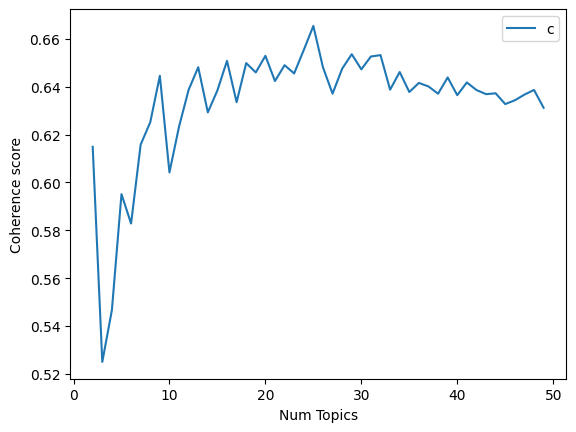

In [ ]:
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

This is the graph representing the suitable number of topic can be selected in the given dataset.
We can select 23 topics

<b>Question 5 - Plot the dependency parser for any two random sentences from the entire corpus/dataset that has at least 10 words in the sentence. Make sure that dependency parser looks good and should visually understandable.</b>

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
sentences = data_df.TITLE.values.tolist()
long_sentences = [sentence for sentence in sentences if len(sentence.split()) > 10]

In [ ]:
sentences[:5]

['Fed official says weak data caused by weather, should not slow taper',
 "Fed's Charles Plosser sees high bar for change in pace of tapering",
 'US open: Stocks fall after Fed official hints at accelerated tapering',
 "Fed risks falling 'behind the curve', Charles Plosser says",
 "Fed's Plosser: Nasty Weather Has Curbed Job Growth"]

In [ ]:
selected_sentence_1 = random.choice(long_sentences)
selected_sentence_2 = random.choice(long_sentences)

In [ ]:
print(selected_sentence_1)

The Bachelor 2014 Winner Spoilers - Is It Nikki Ferrell Or Clare Crawley?


In [ ]:
#displacy.render(nlp(selected_sentence_1), style='dep', jupyter=True, options={'distance': 140})

Dependency parser explanation

In [ ]:
for word in nlp(selected_sentence_1):
    print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

The          DET        DT       determiner
Bachelor     PROPN      NNP      noun, proper singular
2014         NUM        CD       cardinal number
Winner       PROPN      NNP      noun, proper singular
Spoilers     NOUN       NNS      noun, plural
-            PUNCT      :        punctuation mark, colon or ellipsis
Is           AUX        VBZ      verb, 3rd person singular present
It           PRON       PRP      pronoun, personal
Nikki        PROPN      NNP      noun, proper singular
Ferrell      PROPN      NNP      noun, proper singular
Or           CCONJ      CC       conjunction, coordinating
Clare        PROPN      NNP      noun, proper singular
Crawley      PROPN      NNP      noun, proper singular
?            PUNCT      .        punctuation mark, sentence closer


In [ ]:
print(selected_sentence_2)

GLOBAL MARKETS-World stock markets mostly flat, gold edges up on Ukraine  ...


In [ ]:
#displacy.render(nlp(selected_sentence_2), style='dep', jupyter=True, options={'distance': 140})

In [ ]:
for word in nlp(selected_sentence_2):
    print(f'{word.text:{12}} {word.pos_:{10}} {word.tag_:{8}} {spacy.explain(word.tag_)}')

GLOBAL       PROPN      NNP      noun, proper singular
MARKETS      PROPN      NNP      noun, proper singular
-            PUNCT      HYPH     punctuation mark, hyphen
World        PROPN      NNP      noun, proper singular
stock        NOUN       NN       noun, singular or mass
markets      NOUN       NNS      noun, plural
mostly       ADV        RB       adverb
flat         ADJ        JJ       adjective (English), other noun-modifier (Chinese)
,            PUNCT      ,        punctuation mark, comma
gold         NOUN       NN       noun, singular or mass
edges        VERB       VBZ      verb, 3rd person singular present
up           ADP        RP       adverb, particle
on           ADP        IN       conjunction, subordinating or preposition
Ukraine      PROPN      NNP      noun, proper singular
             SPACE      _SP      whitespace
...          PUNCT      .        punctuation mark, sentence closer
